# Introduction
Now we'll try to use KNN to create a model that directly predicts pupose of loan for a new data point based off of the features.

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Get the Data

In [2]:
df = pd.read_csv('../input/loan-data/loan_data.csv')
df.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Standardize Variable

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(df.drop(['credit.policy','purpose'],axis=1))

StandardScaler()

In [6]:
scaled_features = scaler.transform(df.drop(['credit.policy','purpose'],axis=1))

In [7]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[2:])
df_feat.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,-0.436524
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,-0.436524
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,-0.436524
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,-0.436524
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,-0.436524


# Train test split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['purpose'],test_size=0.30)

# Start Using KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(n_neighbors=1)

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
pred = knn.predict(X_test)

# Prediction and evaluation

In [14]:

from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(confusion_matrix(y_test,pred))

[[203  83 257  27  48  40  27]
 [ 95  57 161  15  23  23  14]
 [242 167 597  30  64  45  42]
 [ 36  12  29   4   3   6   2]
 [ 60  30  71   8  20  13   7]
 [ 37  14  45   6  10   9  10]
 [ 33  23  62   4  15   3  42]]


In [16]:
print(classification_report(y_test,pred))

                    precision    recall  f1-score   support

         all_other       0.29      0.30      0.29       685
       credit_card       0.15      0.15      0.15       388
debt_consolidation       0.49      0.50      0.50      1187
       educational       0.04      0.04      0.04        92
  home_improvement       0.11      0.10      0.10       209
    major_purchase       0.06      0.07      0.07       131
    small_business       0.29      0.23      0.26       182

          accuracy                           0.32      2874
         macro avg       0.20      0.20      0.20      2874
      weighted avg       0.32      0.32      0.32      2874



# Choosing K value

In [17]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

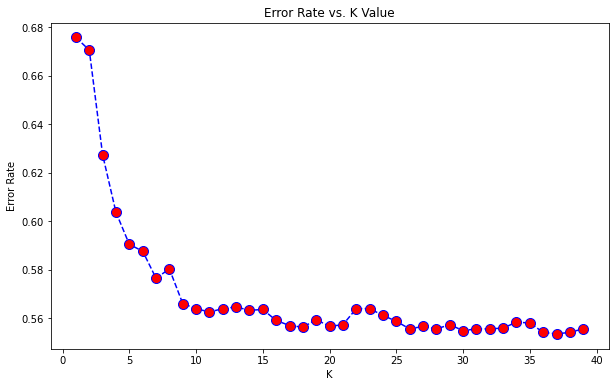

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

from this graph we see that after K > 25, the plots tend to hover around 0.54-0.53, so we chose K = 25

In [19]:
#Now with K = 25
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=25')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=25


[[250  17 415   0   2   1   0]
 [ 83  14 290   0   0   0   1]
 [170  17 994   0   6   0   0]
 [ 39   1  52   0   0   0   0]
 [ 67   9 132   0   1   0   0]
 [ 53   4  72   0   1   0   1]
 [ 38   2 130   0   3   0   9]]


                    precision    recall  f1-score   support

         all_other       0.36      0.36      0.36       685
       credit_card       0.22      0.04      0.06       388
debt_consolidation       0.48      0.84      0.61      1187
       educational       0.00      0.00      0.00        92
  home_improvement       0.08      0.00      0.01       209
    major_purchase       0.00      0.00      0.00       131
    small_business       0.82      0.05      0.09       182

          accuracy                           0.44      2874
         macro avg       0.28      0.18      0.16      2874
      weighted avg       0.37      0.44      0.35      2874



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
